In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import wfdb
import matplotlib.pyplot as plt
#from scipy import signal

In [6]:
os.chdir(r'/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing')

# Problems 
## Our data Contains  61 disease  class

## We need to Classify between normal sinus rythme and Sinus Bradycardia

### In signal processing we have our data stored in .mat file and its label stored .hea file

In [7]:
patient = os.listdir(r'/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing')
patient[:10]                                             #  the first 10 element from the list

['JS02392.hea',
 'JS06072.mat',
 'JS01653.mat',
 'JS04619.hea',
 'JS01155.hea',
 'JS01698.hea',
 'JS03841.hea',
 'JS06055.hea',
 'JS05321.hea',
 'JS00118.mat']

### We need to acces the .hea file only so we can use python built in function filter in oreder to do this process

In [8]:
patient = os.listdir(r'/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing')
patient = list(filter(lambda x : x.split('.')[1] == 'hea',patient )) # filter only hea file
df= pd.DataFrame(patient)                      

In [11]:
df

,0
0,JS02392.hea
1,JS04619.hea
2,JS01155.hea
3,JS01698.hea
4,JS03841.hea
...,...
10242,JS05205.hea
10243,JS03884.hea
10244,JS06281.hea
10245,JS08193.hea


####  We need to acces the data label 

In [12]:
def label_loading(directory):
    with open(directory, 'r') as f:
        lines = f.readlines()
        dx = lines[15].split()
        dx = dx[1].split(',')
        dx = list(map(lambda x : np.int32(x) , dx))
        return dx

In [13]:
label_loading('/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing/JS00001.hea')

[164889003, 59118001, 164934002]

## New problem appeared when working when this data 
### Some patient has more than one diseae because we have some disease affect morphological shape of the data while other just slow heart beat

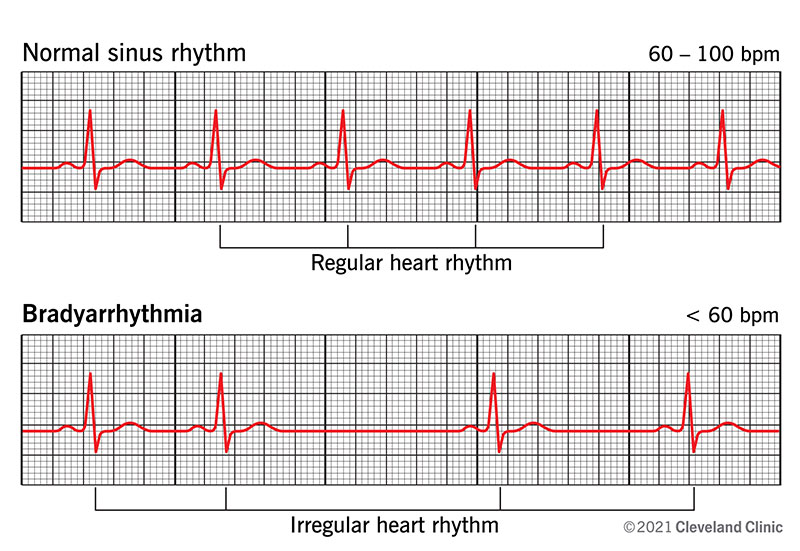Normal versus Sinus Bradycardia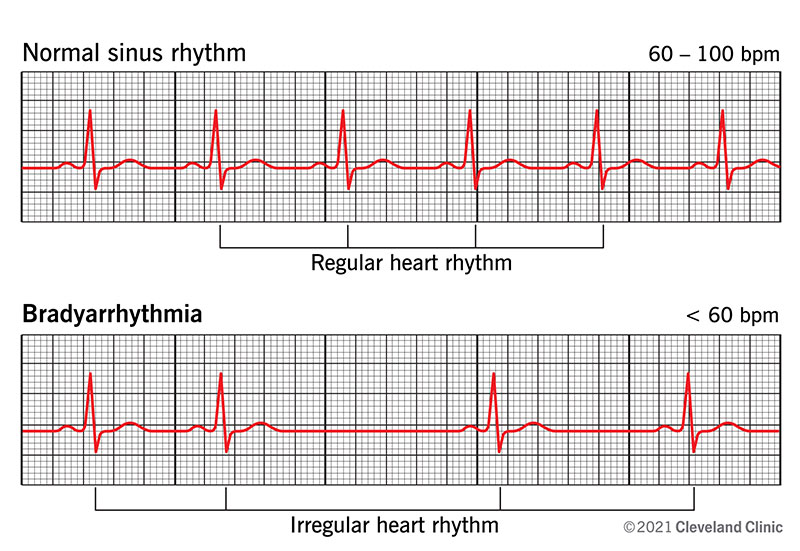)

## Disease affects on Morpholgical shape of heart

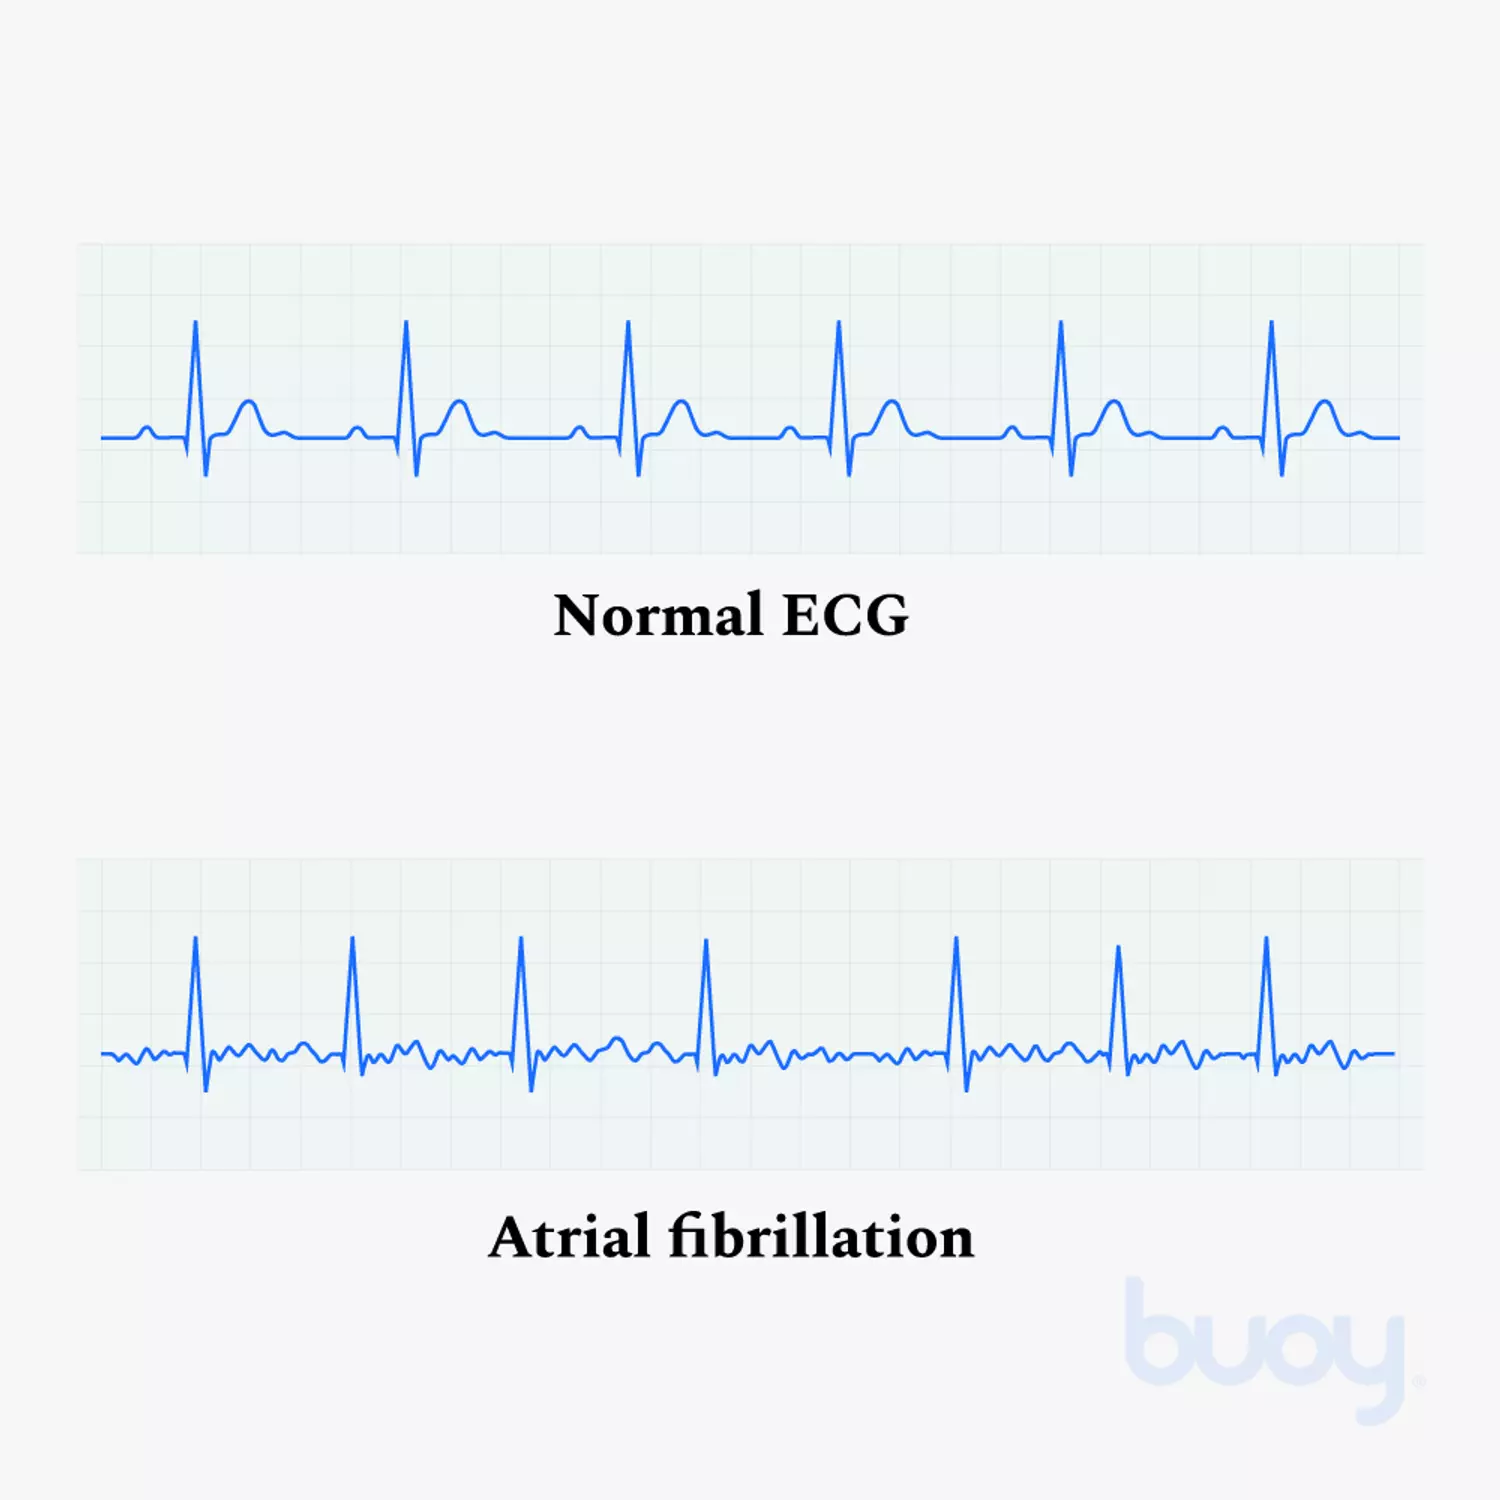

In [14]:
df['diagnosis'] = df[0].apply(label_loading )
df

,0,diagnosis
0,JS02392.hea,"[426177001, 55827005]"
1,JS04619.hea,[426177001]
2,JS01155.hea,[426177001]
3,JS01698.hea,"[426177001, 251199005]"
4,JS03841.hea,"[427084000, 429622005, 428750005, 164931005, 1..."
...,...,...
10242,JS05205.hea,[164890007]
10243,JS03884.hea,"[164889003, 39732003, 55827005, 59118001]"
10244,JS06281.hea,"[427084000, 428750005, 17338001]"
10245,JS08193.hea,[426783006]


### Extract only Patient with only one disease because we are solving a binary classifiation problem

In [15]:
df['diagnosis'].apply(len) == 1

0        False
1         True
2         True
3        False
4        False
         ...  
10242     True
10243    False
10244    False
10245     True
10246    False
Name: diagnosis, Length: 10247, dtype: bool

In [16]:
sub_df = df[df['diagnosis'].apply(len) == 1]
sub_df

,0,diagnosis
1,JS04619.hea,[426177001]
2,JS01155.hea,[426177001]
9,JS04650.hea,[426177001]
10,JS05986.hea,[426783006]
11,JS09092.hea,[164889003]
...,...,...
10237,JS03216.hea,[426783006]
10238,JS06325.hea,[164889003]
10241,JS00494.hea,[426177001]
10242,JS05205.hea,[164890007]


In [17]:
sub_df.loc[::,'diagnosis'] = sub_df.loc[::,'diagnosis'].apply(lambda x : x[0])
sub_df

,0,diagnosis
1,JS04619.hea,426177001
2,JS01155.hea,426177001
9,JS04650.hea,426177001
10,JS05986.hea,426783006
11,JS09092.hea,164889003
...,...,...
10237,JS03216.hea,426783006
10238,JS06325.hea,164889003
10241,JS00494.hea,426177001
10242,JS05205.hea,164890007


### Find the class distribution

In [18]:
sub_df['diagnosis'].value_counts()

diagnosis
426177001    2202
426783006    1366
427084000     644
164889003     422
426761007     379
164890007      87
713422000      25
251166008       7
233897008       5
17366009        4
Name: count, dtype: int64

### This file contain the ID and crosponding label 

In [19]:
label_table = pd.read_csv(r'/kaggle/input/imp-table/ConditionNames_SNOMED-CT.csv')

In [20]:
label_table[label_table['Snomed_CT'] == 426783006    ]

,Acronym Name,Full Name,Snomed_CT
53,SR,Sinus Rhythm,426783006


In [21]:
label_table[label_table['Snomed_CT'] == 426177001  ]

,Acronym Name,Full Name,Snomed_CT
52,SB,Sinus Bradycardia,426177001


### Extract the Sinus Rhythm patient and Sinus Bradycardia from dataset

In [22]:
our_data = sub_df[(sub_df['diagnosis'] == 426177001) | (sub_df['diagnosis'] == 426783006 )]

In [23]:
our_data

,0,diagnosis
1,JS04619.hea,426177001
2,JS01155.hea,426177001
9,JS04650.hea,426177001
10,JS05986.hea,426783006
14,JS04102.hea,426177001
...,...,...
10235,JS03704.hea,426177001
10236,JS01238.hea,426783006
10237,JS03216.hea,426783006
10241,JS00494.hea,426177001


In [24]:
our_data.loc[::,0] = our_data.loc[::,0].apply(lambda x: x.split('.')[0])

In [25]:
our_data.columns = ['directory' , 'diagnosis']

In [27]:
our_data

,directory,diagnosis
1,JS04619,426177001
2,JS01155,426177001
9,JS04650,426177001
10,JS05986,426783006
14,JS04102,426177001
...,...,...
10235,JS03704,426177001
10236,JS01238,426783006
10237,JS03216,426783006
10241,JS00494,426177001


In [28]:
record = wfdb.rdrecord (our_data.iloc[0,0], sampfrom=0 , sampto=5000)

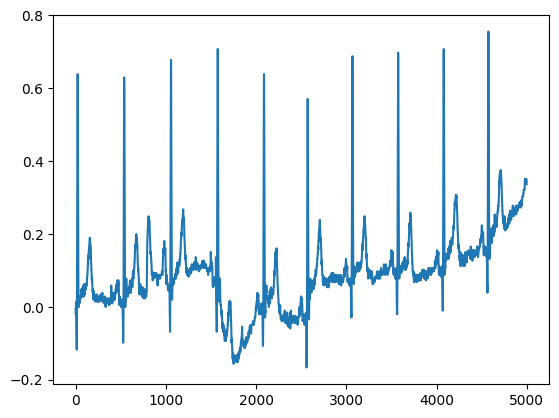

In [29]:
plt.plot(record.__dict__['p_signal'][::,0])

In [30]:
from wfdb import processing
processing.qrs.gqrs_detect(record.__dict__['p_signal'][::,0],500)

array([ 521, 1040, 1557, 2071, 2555, 3051, 3558, 4063])

In [31]:
arr = record.__dict__['p_signal'][:: , 0]

In [32]:
our_label = label_table[(label_table['Snomed_CT'] == 426177001 ) |  (label_table['Snomed_CT'] == 426783006 )]

In [33]:
our_label

,Acronym Name,Full Name,Snomed_CT
52,SB,Sinus Bradycardia,426177001
53,SR,Sinus Rhythm,426783006


In [34]:
dictionary = {}
for  a, b in zip(our_label['Acronym Name'] ,our_label['Snomed_CT']) :
    dictionary[b] = a

In [35]:
dictionary

{426177001: 'SB', 426783006: 'SR'}

In [36]:
our_data['diagnosis'] = our_data['diagnosis'].map(dictionary)

/tmp/ipykernel_33/3316463013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_data['diagnosis'] = our_data['diagnosis'].map(dictionary)


### Visualize the SB  Sinus Bradycardia signal

In [40]:
our_data.reset_index(inplace = True, )

In [41]:
our_data

,level_0,index,directory,diagnosis
0,0,1,JS04619,SB
1,1,2,JS01155,SB
2,2,9,JS04650,SB
3,3,10,JS05986,SR
4,4,14,JS04102,SB
...,...,...,...,...
3563,3563,10235,JS03704,SB
3564,3564,10236,JS01238,SR
3565,3565,10237,JS03216,SR
3566,3566,10241,JS00494,SB


In [47]:
#our_data = our_data.drop('index' ,axis = 1)
our_data = our_data.drop('level_0' ,axis = 1)
our_data

,directory,diagnosis
0,JS04619,SB
1,JS01155,SB
2,JS04650,SB
3,JS05986,SR
4,JS04102,SB
...,...,...
3563,JS03704,SB
3564,JS01238,SR
3565,JS03216,SR
3566,JS00494,SB


In [49]:
our_data.to_csv(r'/kaggle/working/imp.csv')